In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

In [29]:
#회귀 모델에서 R^2를 사용해 모델을 평가하는 일반적인 방법

In [30]:
from mglearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X,y = make_blobs(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
log = LogisticRegression().fit(X_train, y_train)

print(f"test score : {log.score(X_test, y_test):0.3f}")

test score : 0.920


# 교차 검증

## K-겹 교차검증
### 데이터를 k개로 나눈다.
### 나눈 데이터 중 i번째 데이터를 j개의 데이터들을 통해 훈련시킨 뒤 평가한다. (j = 1~k 단 i!=j) 

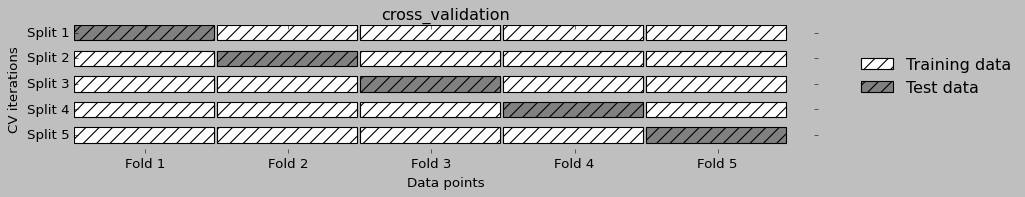

In [31]:
mglearn.plots.plot_cross_validation()

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

data = load_iris()
log = LogisticRegression(max_iter=1000)

# default k = 5
score = cross_val_score(log, data.data, data.target)
print("교차 검증 점수 :", score)

# 10-k-겹 교차검증
score = cross_val_score(log, data.data, data.target, cv=10)
print("교차 검증 점수 :", score)

교차 검증 점수 : [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 점수 : [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [37]:
# cross_validate는 훈련에 걸린시간, 테스트에 걸린 시간, 테스트 점수를 반환한다.
# cross_val_score 는 이중 test_score만 반환하는 것이다.

from sklearn.model_selection import cross_validate
res = cross_validate(log, data.data, data.target)
res

{'fit_time': array([0.01266909, 0.00839281, 0.00518775, 0.00452518, 0.00524592]),
 'score_time': array([0.00149393, 0.00014114, 0.00022006, 0.00016999, 0.00016928]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [44]:
res_df = pd.DataFrame(res)
res_df.loc["mean"] = res_df.mean()
res_df


,fit_time,score_time,test_score
0,0.012669,0.001494,0.966667
1,0.008393,0.000141,1.000000
2,0.005188,0.000220,0.933333
3,0.004525,0.000170,0.966667
4,0.005246,0.000169,1.000000
mean,0.007204,0.000439,0.973333


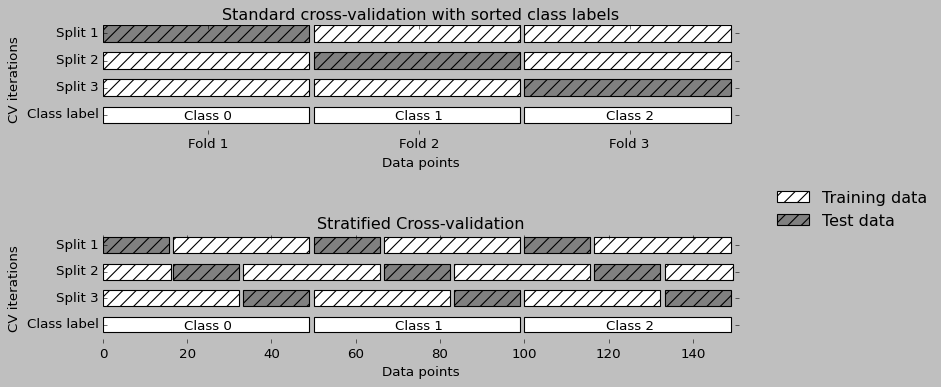

In [45]:
# 데이터에 순서가 존재하다면 단순 k-겹 교차검증은 바람직하지 못할 수 있다.
mglearn.plots.plot_stratified_cross_validation()

## 교차 검증 상세 옵션
### 데이터의 순서를 없애는 방법

In [50]:
# 데이터의 순서를 뒤죽박죽으로 만드는 방법
from sklearn.model_selection import KFold

# iris 데이터에는 순서가 존재하므로 교차검증 점수가 매우 좋지 않다.
kfold = KFold(n_splits=3)
print(cross_val_score(log, data.data, data.target, cv=kfold))

# 데이터를 무작위로 섞어서 순서를 없앤다.
kfold = KFold(n_splits=3, shuffle=True)
print(cross_val_score(log, data.data, data.target, cv=kfold))

[0. 0. 0.]
[0.98 0.96 0.94]


## LOOCV
### 큰 데이터에는 시간이 오래걸리지만 작은 데이터에는 이따금 유용하다.

In [51]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

score = cross_val_score(log, data.data, data.target, cv=loo)
print("교차 검증 분할 수 : ", len(score))
print("교차 검증 점수 : ", score.mean())

교차 검증 분할 수 :  150
교차 검증 점수 :  0.9666666666666667
